## Primer: zimske olimpijske igre, Soči 2014

Na primeru podatkov o olimpijskih igrah bomo spoznali tabelarično predstavitev podatkov (atribut-vrednost) v paketu Orange. Preizkusili bomo nekatere pogoste načine grafičnega prikaza podatkov.

## Example: Winter Olympics, Sochi 2014

On the case of information about the Olympic Games, we will get to know the tabular presentation of the data (attribute value) in the Orange package. We will try some common ways to graphically display data.

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

### Predstavitev podatkov

Tokrat imamo opravka s športniki, ki so nastopali na zimskih olimpijskih igrah v ruskem letovišču Soči ob Črnem morju leta 2014. 

Za vsakega nastopajočega športnika so na voljo naslednji podatki (atributi):

* ime in priimek,
* starost v letih,
* datum rojstva,
* spol,
* telesna višina,
* telesna teža,
* št. osvojenih zlatih medalj,
* št. osvojenih srebrnih medalj,
* št. osvojenih bronastih medalj,
* št. vseh osvojenih medalj,
* športna panoga,
* država, katero zastopa.

##### Vprašanje 2-2-1

S kakšnim podatkovnim tipom bi predstavil/a vsakega od atributov?

### Data presentation

This time we are dealing with athletes who took part in the Winter Olympics in the Russian resort Sochi near the Black Sea in 2014.

The following data (attributes) are available for each athlete:

* name and surname,
* age in years,
* date of birth,
* gender,
* height,
* body weight,
* no. won gold medals,
* no. won silver medals,
* no. won bronze medals,
* no. of all medals won,
* The sports category,
* the country it represents.

##### Question 2-2-1

With what kind of data type would you present each of the attributes?

[Odgovor](202-2.ipynb#Odgovor-2-2-1)

[Answer](202-2.ipynb#Answer-2-2-1)

Do sedaj smo spoznali načine za shranjevanje numeričnih podatkov, kot so cela in decimalna števila. Nenumerične podatke, kot so država ter naziv tekmovalca, ne moremo enostavno predstaviti v numerični obliki. Pomagali si bomo s knjižnjico `Orange`, ki skupaj s  števili hrani naslednje tipe podatkov:

* **[c]ontinuous** ali zvezni atributi, s katerimi predstavimo številske podatke (tudi cela števila),
* **[d]iscrete** ali diskretni atributi imajo zalogo vrednosti iz končne množice. Npr. spol je element množice `{moški, ženska}` ali okusi sladoleda `{čokolada, vanilija, jagoda}`. Pomni, da za razliko od števil med elementi takih množic ne obstaja urejen vrstni red.
* **[s]tring** ali niz znakov, hrani nize znakov poljubne (končne) dolžine.

So far, we have learned ways to store numerical data, such as integers and decimal numbers. Numerical data, such as the country and the name of the competitor, can not be easily represented in numerical form. We will use the `Orange` library, which stores the following data types along with numbers:

* **[c]ontinuous**  attributes to represent numerical data (including integers),
* **[d]iscrete**  attributes have a stock of values from a finite set. For example. Gender is an element of the `{man, woman}` set, or ice-cream flavors `{chocolate, vanilla, strawberry}`. Note that, unlike with numbers, there is no order between the elements of such sets. 
* **[s]tring** of characters, stores the sets of characters of any (final) length.

##### Vprašanje 2-2-2

Katerega od treh naštetih tipov podatkov bi uporabil za vsakega od atributov športnikov? Rešitev najdeš, če si ogledaš prvih nekaj vrstic datoteke [`athletes.tab`](podatki/athletes.tab).

##### Question 2-2-2

Which of the three types of data would you use for each of the athletes' attributes? You can find the solution if you look at the first few lines of the file [`athletes.tab`](podatki/athletes.tab).

[Odgovor](202-2.ipynb#Odgovor-2-2-2)

[Answer](202-2.ipynb#Answer-2-2-2)

### Programski paket `Orange`

Podatke naložimo v objekt tabela, `Table`. Podatkovni tipi atributov so določeni v datoteki.  

### `Orange` software package

We load the data into the object table, `Table`. The data types of attributes are specified in the file.

In [2]:
from Orange.data.filter import SameValue
from Orange.data import Table
data = Table('podatki/athletes.tab')

Domena je množica imen stolpcev.

Domain is a set of column names.

In [3]:
data.domain

[age, gender, height, weight, gold_medals, silver_medals, bronze_medals, total_medals, sport, country] {birthdate, name}

Preverimo tipe posameznih atributov.

Check the types of individual attributes.

In [4]:
for column in data.domain.variables:
    print(column, type(column))

age ContinuousVariable
gender DiscreteVariable
height ContinuousVariable
weight ContinuousVariable
gold_medals ContinuousVariable
silver_medals ContinuousVariable
bronze_medals ContinuousVariable
total_medals ContinuousVariable
sport DiscreteVariable
country DiscreteVariable


Za diskretne atribute lahko dostopamo do zaloge vrednosti.

For discrete attributes we can access the set of values.

In [5]:
data.domain['sport'].values

['Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross-Country',
 'Curling',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track',
 'Skeleton',
 'Ski Jumping',
 'Snowboard',
 'Speed Skating']

Dostopamo lahko do posameznih vrstic:

We can access individual lines:

In [6]:
print(data[0])
print()
print(data[1:3])

[17, Male, 1.72, 68, 0, 0, 0, 0, Freestyle Skiing, United States] {1996-04-12, Aaron Blunck}

[[27, Male, 1.85, 85, 0, 0, 0, 0, Snowboard, Italy] {1986-05-14, Aaron March},
 [21, Male, 1.78, 68, 0, 0, 0, 0, Short Track, Kazakhstan] {1992-06-30, Abzal Azhgaliyev}]


Dostopamo lahko do atributov posamezne vrstice.
Navedeni načini so ekvivalentni za dostop do športa športnika v prvi vrstici:

We can access the attributes of each line.
These modes are equivalent to accessing the sport on the sportsman in the first line:

In [7]:
print(data[0, 8])
print(data[0, data.domain['sport']])
print(data[0, data.domain.index('sport')])
print(data[0, 'sport'])  # neposredno po imenu atributa

Freestyle Skiing
Freestyle Skiing
Freestyle Skiing
Freestyle Skiing


Dostopamo tudi do več stolpcev hkrati:

We also access multiple columns at the same time:

In [8]:
print(data[0, ['sport', 'name', 'age']])
print(data[0, [8, 0, -2]])

[[Freestyle Skiing, 17] {Aaron Blunck}]
[[Freestyle Skiing, 17] {Aaron Blunck}]


Številski podatki so shranjeni v numpyjevi tabeli znotraj objekta `Table`. Imena, datuma rojstva in države v tej matriki ne bomo našli. Zakaj?

Numerical data are stored in the numpy table within the `Table` object. We will not find names, date of birth, and country in this matrix. Why?

In [9]:
data.X

array([[ 17.  ,   1.  ,   1.72, ...,   0.  ,   5.  ,  79.  ],
       [ 27.  ,   1.  ,   1.85, ...,   0.  ,  12.  ,  36.  ],
       [ 21.  ,   1.  ,   1.78, ...,   0.  ,   9.  ,  39.  ],
       ..., 
       [ 28.  ,   0.  ,   1.68, ...,   0.  ,  12.  ,  28.  ],
       [ 22.  ,   1.  ,   1.76, ...,   1.  ,   5.  ,  16.  ],
       [ 19.  ,   0.  ,   1.58, ...,   0.  ,   9.  ,  30.  ]])

### Izbira podmnožice vrstic

Za izbiro podmnožice vrstic uporabimo filter. Naredimo objekt filter, ki vključuje pogoj ter ga pokličemo na podmnožici podatkov.

### Selecting a subset of rows

We use a filter to select a subset of rows. Let's create a filter object that includes a condition and call it on a subset of the data.

In [10]:
# ustvarimo filter, SameValue(spremenljivka, vrednost)
filt = SameValue(data.domain['sport'], 'Alpine Skiing')

# izberi vse alpske smučarje
data_subset = filt(data)
data_subset

[[21, Male, 1.86, 82, 0, ...] {1992-07-30, Adam Barwood},
 [18, Male, 1.70, 76, 0, ...] {1995-04-22, Adam Lamhamedi},
 [23, Male, 1.78, 80, 0, ...] {1990-09-13, Adam Zampa},
 [21, Female, 1.62, 56, 0, ...] {1992-09-28, Adeline Baud},
 [29, Male, 1.82, 80, 0, ...] {1984-09-18, Adrien Theaux},
 ...
]

### Prikaz točk v prostoru

Poglejmo, ali sta višina in teža športnikov povezani. Za vsakega športnika narišimo točko v prostoru dveh spremelnjivk - razsevni diagram (ang. *scatter plot*).

### Display points in space

Let's see if the height and weight of athletes are linked. For each athlete we draw a point in the space of two variables - a Scatter plot.

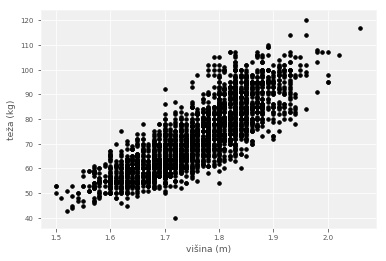

In [11]:
plt.figure()
x = data.X[:, 2]    # višina
y = data.X[:, 3]    # teža
plt.plot(x, y, "k.")
plt.xlabel('višina (m)')
plt.ylabel('teža (kg)');

##### Vprašanje 2-2-3

Videti je, da sta spremenljivki povezani. Ali sta višina in teža res povezani? Odgovor na to vprašanje lahko dobimo z merami korelacije. S pomočjo slednjih izmerimo, ali sta dve naključni spremenljivki povezani.

<a href="https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient">Pearsonova korelacija</a> med spremenljivkama $X$ in $Y$ je definirana z naslednjim izrazom:

$$\rho = \frac{(x - \bar{x})(y - \bar{y})}{\sigma_x \sigma_y}$$

kjer sta $x$ in $y$ vektorja vzorcev naključnih spremenljivk $X$ in $Y$, $\bar{x}$ in $\bar{y}$ povprečni vrednosti, $\sigma_x$, $\sigma_y$ standardna odklona. Mera $\rho$ zavzame vrednosti v intervalu [-1, 1], kjer vrednost -1 pomeni, da med spremenljivki velja negativna korelacija - sta obratno sorazmerni, vrednost 1 pa da sta premo sorazmerni. Vrednost 0 nakazuje, da sta spremenljivki neodvisni.

##### Question 2-2-3

It looks like the variables are linked. Are height and weight really connected? The answer to this question can be obtained with correlation measures. Using the latter, we measure whether two random variables are connected.

<a href="https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient">Pearson's correlation</a> between the variables $X$ and $Y$ is defined with the following expression:

$$\rho = \frac{(x - \bar{x})(y - \bar{y})}{\sigma_x \sigma_y}$$

where $x$ and $y$ are vector of samples of random variables $X$ and $Y$, $\bar{x}$ and $\bar{y}$ are mean values, $\sigma_x$, $\sigma_y$ standard deviation. The $\rho$ measure takes the values ​​in the interval [-1, 1], where the -1 value means that the variables are negatively correlated - they are inversely proportional, and the value 1 is proportional. The value 0 indicates that the variables are independent.

In [12]:
# implementiraj funkcijo, ki vrne Pearsonovo mero korelacije za vektorja x, y
def pearson(x, y):
    pass

In [13]:
# preveri ali sta višina in teža povezani
pearson(x, y)

[Odgovor](202-2.ipynb#Odgovor-2-2-3)

[Answer](202-2.ipynb#Answer-2-2-3)

### Prikaz porazdelitev

Negotovost pri opazovanju naključne spremenljivke predstavimo s funkcijo porazdelitve. Pogost način, kako dobimo oceno za porazdelitev iz podatkov je uporaba histograma - preštejemo, koliko primerov spada v interval vrednosti spremenljivke. Poglejmo primer za telesno težo.

### Display distributions

We present uncertainty in the observation of a random variable with the distribution function. The common way in which we obtain an estimate for the distribution of data is the use of a histogram - counting how many cases fall into the interval of the value of the variable. Let's look at an example of body weight.

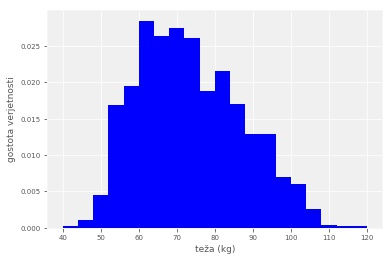

In [14]:
# porazdelitev tež
weights = data.X[:, 3]

plt.figure()
plt.hist(weights, density=True, bins=20, color='blue')
plt.xlabel('teža (kg)')
plt.ylabel('gostota verjetnosti');

##### Vprašanje 2-2-4

Ali so porazdelitev teže med posameznimi športi razlikuje? Kaj pa višine? Izberi športnike nekaterih športov in med njimi primerjaj porazdelitve.

##### Question 2-2-4

Is the weight distribution different for different sports? What about the heights? Choose athletes of some sports and compare distributions between them.

In [15]:
# Primerjaj športe po porazdelitvi tež
# Primerjaj športe po porazdelitvi višin

[Odgovor](202-2.ipynb#Odgovor-2-2-4)

[Answer](202-2.ipynb#Answer-2-2-4)

### Nagrade za dosego najvišjih mest

Še en način prikaza porazdelitev je tortni diagram. Prikažimo, kakšen kos pogače prinese vsaka od medalj (zlato \$25.000, srebro \$15.000, bron \$10.000).

### Prizes for reaching the highest places

Another way of displaying distributions is a pie chart. Show what piece of cake each of the medals (gold \$25,000, silver \$15,000 bronze \$10,000) brings .

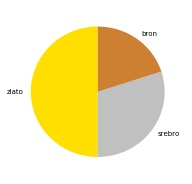

In [16]:
# prikaži primer slike in reprodukcija ; št medalj glede na državo
# Nariši tortni diagram za vsako državo posebej

# Denarni sklad; $25,000 za zlato, $15,000 za srebrno, $10,000 za bronasto medaljo 
total      = 25 + 15 + 10
gold_ratio = 25 / total
silv_ratio = 15 / total
bron_ratio = 10 / total

# barve medalj
gold_color = '#FFDF00'
silv_color = '#C0C0C0'
bron_color = '#CD7F32'

plt.figure(figsize=(3, 3))
plt.pie((gold_ratio, silv_ratio, bron_ratio),
        labels=('zlato', 'srebro', 'bron', ), 
        colors=(gold_color, silv_color, bron_color, ), 
        startangle=90);

Lažje berljiv stolpični diagram:

An easier to read bar diagram:

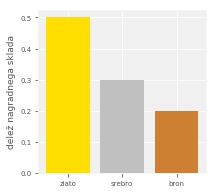

In [17]:
# lažje berljivi stolpični diagram
plt.figure(figsize=(3, 3))
plt.bar(range(3), height=(gold_ratio, silv_ratio, bron_ratio), 
        tick_label=('zlato', 'srebro', 'bron'), 
        color=(gold_color, silv_color, bron_color))
plt.ylabel('delež nagradnega sklada');

### Spol udeležencev

Prikažimo še bolj informativno porazdelitev, ki pokaže število moških in ženskih udeležencev iger za posamezno državo. Najprej izračunamo porazdelitev.

### Gender of participants

We show an even more informative distribution that shows the number of men and women participating in games for each country. First, calculate the distribution.

In [18]:
countries = data.domain['country'].values
gender_by_country = dict()

for country in countries:
    # Filter by countries
    filt        = SameValue(data.domain['country'], country)
    data_subset = filt(data)

    # Filter males
    filt        = SameValue(data.domain['gender'], 'Male')
    data_subset_male = filt(data_subset)

    # Filter females
    filt        = SameValue(data.domain['gender'], 'Female')
    data_subset_female = filt(data_subset)

    # Store gender counts
    gender_by_country[country] = {
        'Male': len(data_subset_male),
        'Female': len(data_subset_female),
    }

Nato narišemo sliko z uporabo funkcijo `bar`:

Then draw a picture using the `bar` function:

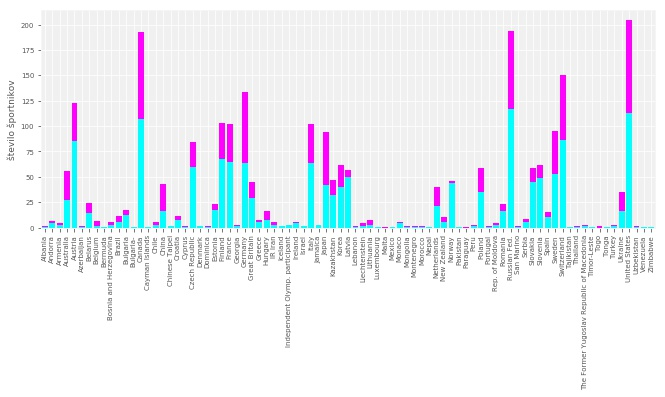

In [19]:
m = [gender_by_country[country]['Male'] for country in countries]
f = [gender_by_country[country]['Female'] for country in countries]
x = range(len(countries))

plt.figure(figsize=(11, 4))
plt.bar(x, m, color='cyan', align='center')
plt.bar(x, f, bottom=m, color='magenta', align='center')
plt.xlim(-0.5, len(countries)-0.5)
plt.xticks(x)
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel('število športnikov');

##### Vprašanje 2-2-5

Grafu dodaj legendo.

##### Question 2-2-5

Add a legend to the graph.

[Odgovor](202-2.ipynb#Odgovor-2-2-5)

[Answer](202-2.ipynb#Answer-2-2-5)

##### Vprašanje 2-2-6

Zgornji graf uredi tako, da bodo države urejene po številu udeležencev in dodaj legendo.

##### Question 2-2-6

Edit the above graph so that the sport is arranged by the number of participants and add the legend.

[Odgovor](202-2.ipynb#Odgovor-2-2-6)

[Answer](202-2.ipynb#Answer-2-2-6)

### Najuspešnejše države

##### Vprašanje 2-2-7

Nariši sliko, podobno spodnji. Diagram prikazuje porazdelitev posameznih medalj po državah. Namig: najprej predpripravi podatke, nato pa nariši diagram. Zgleduj se po prejšnih primerih.

### The most successful countries

##### Question 2-2-7

Draw a picture, similar to the one below. The diagram shows the distribution of individual medals by country. Tip: Prepare the data first, then draw a diagram. Take a look at previous examples.

![](slike/odgovori/2-2-7.png)

In [20]:
# izračunaj distribucijo medalj

In [21]:
# izriši distribucijo

[Odgovor](202-2.ipynb#Odgovor-2-2-7)

[Answer](202-2.ipynb#Answer-2-2-7)

### Sestavljene vizualizacije

### Composite visualizations

Namen dobre vizualizacije je prava mera podatkov na danem prostoru. Ta naj ne bo prevelika, vseeno pa želimo čimbolje izkoristiti prostor. Oglejmo si primer risanja <b>porazdelitev podatkov o višini in teži glede na posamezno športno panogo</b>.  

The purpose of a good visualization is the correct amount of data in a given space. This should not be too big, but we want to make the most of the space. Let's look at the example of drawing <b>distribution of data about height and weight by sport category</b>.

In [22]:
# priprava podatkov
# teža in višina glede na sport; sport se nahaja v 8 stolpcu
sports = data.domain['sport'].values
weights_by_sport = dict()
heights_by_sport = dict()
ages_by_sport = dict()

for sport in sports:
    filt = SameValue(data.domain['sport'], sport)
    data_subset = filt(data)
    
    w = data_subset[:, data.domain.index('weight')].X.ravel()
    h = data_subset[:, data.domain.index('height')].X.ravel()
    a = data_subset[:, data.domain.index('age')].X.ravel()
    
    weights_by_sport[sport] = w
    heights_by_sport[sport] = h
    ages_by_sport[sport]    = a

##### Vprašanje 2-2-8

Nariši sliko, podobno spodnji. Diagram prikazuje porazdelitev višine po športih. Za vsakega igralca narišimo točko, kjer bo velikost točke premo sorazmerna s težo športnika. Osi x in y bomo izkoristili tako, da na osi x narišemo višino, na osi y pa bo posamezna športna panoga.

##### Question 2-2-8

Draw a picture, similar to the one below. The diagram shows the height distribution by sports. For each player, we draw a point where the point size is proportional to the weight of the athlete. Axes x and y will be used to draw the height on the x-axis, and the y-axis will be an individual sporting industry.

![](slike/odgovori/2-2-8.png)

In [23]:
# napiši kodo za izris slike

[Odgovor](202-2.ipynb#Odgovor-2-2-8)

[Aswer](202-2.ipynb#Answer-2-2-8)

##### Vprašanje 2-2-9

Uredi zgornji graf tako, da bodo športi urejeni po povprečni višini. Poizkusi tudi spreminjati količine na posameznih oseh (x, y, velikost pike).

##### Question 2-2-9

Edit the graph above so that the sports are arranged by the average height. Try also to change the quantities on the individual axes (x, y, the size of the dots).

[Odgovor](202-2.ipynb#Odgovor-2-2-9)

[Answer](202-2.ipynb#Answer-2-2-9)